# Fast Fourier Transform
```
Shivam Kumaran
sc17b122
date 02/12/2020
Computational Astrophysics
```

In [4]:
import numpy as np
from fft import compute_fft , compute_ifft , fft_freq
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme('paper')
np.random.seed(878627362)

## FFT Implementation
- Takes Given data with $2^N$ data points
- Reordes it for FFT    
    - Convers indices to binary [function:dec_to_bin]
    - reverse bit order [order_bit_rev]
    - convert it back to deciaml [bin_to_dec]
- Computes output at every stage
    - Use function 'get_index_pair' to pair the indices as per the current stage
    - Send these pairs to FFT butterfly function [butterfly_FFT]
- Output from previos stage is discarded and is replaced with updated value from current stage

## IFFT Implementation
> implementation is same as FFT , with minor tweaks

- No reordering is done on input
- Computes output at every stage
    - Use function 'get_index_pair' to pair the indices as per the current stage, this time the stage index is the reverse of that of FFT (to elaborate , alternate pairing was done at the  1st stage of FFT , now alternate pairing is done at the end stage for IFFT)
    - Use butterfly diagram for IFFT  [butterfly_IFFT]
- Output from previos stage is discarded and is replaced with updated value from current stage
- reordering using [order_bit_reverse]


In [5]:

def dec_to_bin(n):
    '''
    Convert GIven decimal number to Binary Number
    '''
    if (n==1): return [1]
    if(n==0): return [0]
    q = n//2
    rem = n%2
    #print(q)
    bin_val = []
    while(q!=0):
        q = n//(2)
        rem = n%(2)
        bin_val.append(rem)
        n = q 
    return bin_val[::-1]

def bin_to_dec(x):
    '''
    Converts Given binary number To decimal Number
    '''
    p = [2**i for i in range(len(x))][::-1]
    val = sum( [x*p for x,p in zip(x,p)])
    return val
#print(dec_to_bin(2))

def order_bit_rev(x):
    '''
    Reverse Bit-order of binary number
    '''
    import numpy as np
    index = [i for i in range(len(x))]
    p = int(np.log2(len(x)))
    bin_index = [dec_to_bin(i) for i in range(len(x))]
    for i in range(len(bin_index)):
        l = len(bin_index[i])
        while(l<p):
            bin_index[i].insert(0,0)
            l = len(bin_index[i])

    bin_index_rev = [b[::-1] for b in bin_index]
    index_rev = [bin_to_dec(b) for b in bin_index_rev]
    x_temp= [1]*len(x)

    for i in range(len(x)):
        x_temp[i] = x[index_rev[i]]
    return (x_temp)


In [6]:
def get_index_pair(n,stg):
    '''
    based on the stage , returns set of indices 
    which should be given to 1wo point butterfly 
    '''
    flag = 1
    x = np.arange(n)
    delta_stp = 2**(stg)
    grp_1 , grp_2 = [] , []
    for i in range(0,len(x),delta_stp):
        for k in range(i,i+delta_stp):
            #print(k , flag)
            if(flag==1):
                grp_1.append(x[k])
            else: grp_2.append(x[k])
            #print(flag)
        flag*=-1
    index_pair = [[i1,i2] for i1,i2 in zip(grp_1, grp_2)]
    return index_pair

def butterfly_fft(x , w ):
    '''
    Implements butterfly diagram 
    for two points with given w
    for FFT
    '''
    f0 = x[0] + w*x[1]
    f1 = x[0] - w*x[1]
    return ([f0,f1])
def butterfly_ifft(x , w ):
    '''
    Implements butterfly diagram 
    for two points with given w 
    for Inverse FFT
    '''
    f0 = x[0] + x[1]
    f1 = w*(x[0] - x[1])
    return ([f0,f1])


def compute_fft(x):
    '''
    Given input data X return its DFT
    '''
    stages = int(np.log2(len(x)))
    x = order_bit_rev(x)
    for stg in range(stages):
        ind = get_index_pair(len(x),stg)
        i = 0
        N = 2**(stg+1)
        for pair in ind:
            k = i%(2**(stg))
            inp_pair = [x[pair[0]] , x[pair[1]]]
            w = np.exp(-(2j*np.pi*k)/(N)).round(15)
            x[pair[0]],x[pair[1]] = butterfly_fft(inp_pair , w)
            i+=1
    x = [round(x_i, 8) for x_i in x]
    l = len(x)
    return x
    
def compute_ifft(x):
    l = len(x)
    stages = int(np.log2(l))
    for stg in range(stages):
        stg_ord = stages - stg - 1
        ind = get_index_pair(len(x),stg_ord)
        i = 0
        N = 2**(stg_ord+1)
        for pair in ind:
            k = i%(2**(stg_ord))
            inp_pair = [x[pair[0]] , x[pair[1]]]
            w = np.exp((2j*np.pi*k)/(N)).round(15)
            x[pair[0]],x[pair[1]] = butterfly_ifft(inp_pair , w)
            i+=1
    x = order_bit_rev(x)
    x = [round(float(x_i/8) , 4)  for x_i in x]
    return x 

def  fft_freq(n,del_t):
    del_om = (2*np.pi)/(del_t*n)
    set_a = np.arange(0 , n/2)*del_om 
    set_b = np.arange(-n/2 ,0)*del_om
    f = np.append(set_a , set_b)
    return f


## Problem 01

In [7]:
a = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
f_a = compute_fft(a)
print("Computed FT:" , f_a)
f_a_inv = compute_ifft(f_a)
print("Using inverse FFT:" , f_a_inv)

Computed FT: [(1+0j), -1j, (-1+0j), 1j, (1+0j), -1j, (-1+0j), 1j]
Using inverse FFT: [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## Problem 02

In [8]:
def f(t):
    val = np.cos(6*np.pi*t)
    return val

In [9]:
def analysis(n, delta_t , f ,  save_plot=""):
    t = []
    t_0 = 0   
    for i in range(n):
        t.append(t_0 +  i*delta_t)

    t = np.asarray(t)
    om = fft_freq(n,delta_t)
    ft= f(t)
    fw = compute_fft(ft)
    fw_p = [abs(f)**2 for f in fw]
    om_max = om[np.argmax(fw_p)]

    fig = plt.figure(figsize=(12,4))
    ax1 = fig.add_subplot(121)
    ax1.stem(t,ft , linefmt='-')
    #ax1.stem(fw_p)
    ax2 = fig.add_subplot(122)
    ax2.stem(om,fw_p)
    ax1.set_title('Time series data')
    ax2.set_title('Power spectrum')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('f(t)')
    ax2.set_xlabel("$\omega$")
    ax2.set_ylabel("Power")
    
    if(save_plot!=""):
        plt.savefig(save_plot)
    plt.show()



## Optimal $\Delta t$

In the given SIgna frequency available:

$\omega = 6\pi$

$f = 3 Hz$

Hence Nyquist frequency = $f_n = 6 Hz$
In the time domain sampling frequency must be greater than Nyquist frequency 
$\Delta t \leq \frac{1}{f_n} = \frac{1}{6} Hz$

Hence $\Delta t$ less than 0.16 will give optimal DFT 

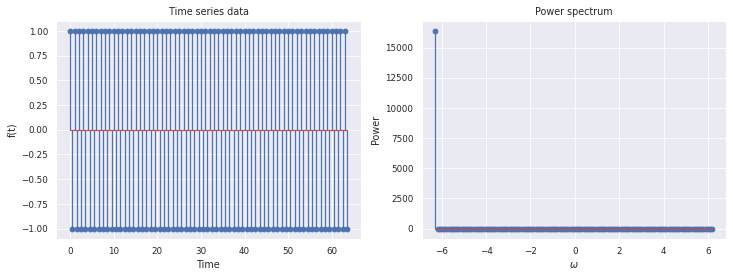

In [10]:
analysis(128, 0.5 , f)

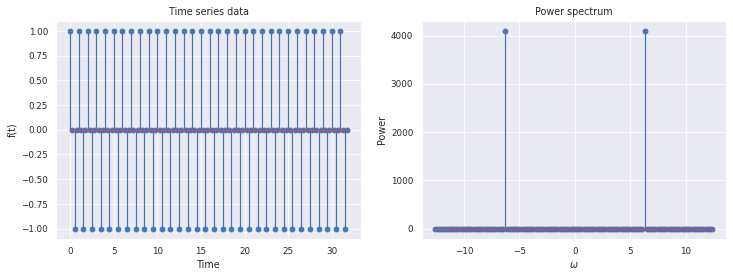

In [11]:
analysis(128, 0.25 , f)

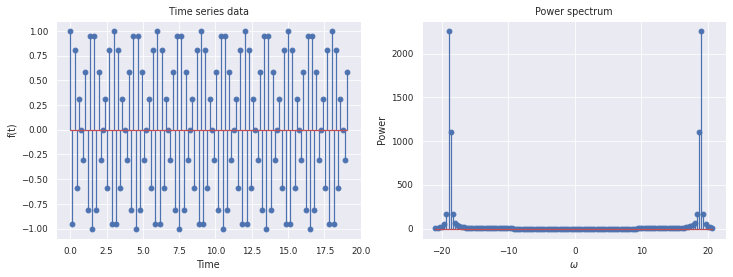

In [12]:
analysis(128, 0.15 , f)

## Optimal $T$


As we decrease data points, we are efectively reducing the time interval $T$ of the time signal considered for DFT , for optimal DFT we should ensure to take samples from a period greater than the maximum periodicity of time signal ,

Also as the Interval size increases for a given time-step size , the sampling in frequency domain increases , however it also increases computation complexity.


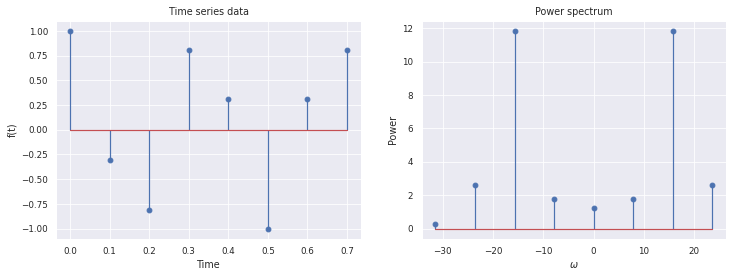

In [13]:
analysis(8 ,  0.1 , f)

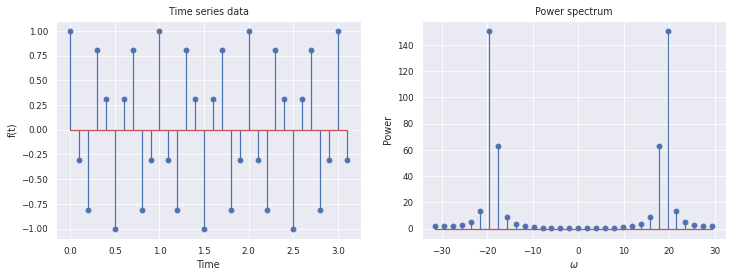

In [14]:
analysis(32, 0.1 , f)

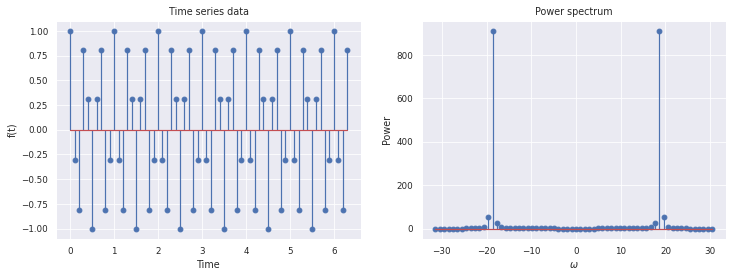

In [15]:
analysis(64, 0.1 , f)

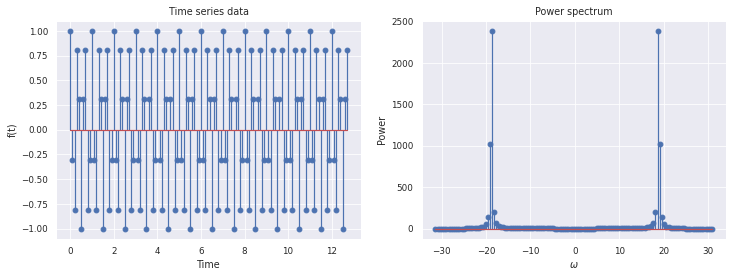

In [16]:
analysis(128, 0.1 , f)

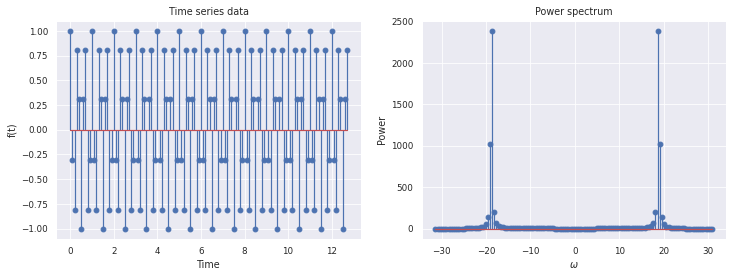

In [17]:
analysis(128, 0.1 , f)

## Conclusion

From the above plots we see that after $N = 128$ of $T = 12.8 s$ , resolution of DFT is sufficient.
$\Delta t = 0.1$  and $T = 12.8s $ gives optimal DFT